In [1]:
import numpy as np
import pandas as pd
import os
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
gdf_ams = gpd.read_parquet('../data/processed/gdf_ams.parquet')
gdf_ams

geometry  bike_path_length  \
0     POLYGON ((4.92310 52.41735, 4.92708 52.41854, ...        206.087544   
1     POLYGON ((4.86912 52.41706, 4.87310 52.41825, ...        741.473718   
3     POLYGON ((4.96284 52.35752, 4.96683 52.35872, ...        469.120090   
6     POLYGON ((4.97253 52.30455, 4.97651 52.30575, ...       2221.874331   
7     POLYGON ((5.01897 52.30659, 5.02295 52.30779, ...       1922.459198   
...                                                 ...               ...   
1408  POLYGON ((5.03580 52.39148, 5.03977 52.39268, ...          0.000000   
1409  POLYGON ((4.80389 52.34955, 4.80788 52.35075, ...       3914.396988   
1410  POLYGON ((4.97788 52.35407, 4.98186 52.35527, ...       1166.097203   
1413  POLYGON ((4.93370 52.40858, 4.93768 52.40977, ...       1288.509301   
1415  POLYGON ((4.99199 52.30643, 4.99598 52.30763, ...        986.459631   

      within_city  main_roads_length  walks_length  dist_to_city_center[m]  \
0            True        2098.509540   5813.489633             5154.879288   
1            True         654.011608  12426.317471             4762.373953   
3            True        2341.332799  16288.325466             5439.435727   
6            True        2135.979607  22099.434776             9781.879987   
7            True        4003.971395   9222.543796            11756.381291   
...           ...                ...           ...                     ...   
1408         True           0.000000      0.000000            10147.838634   
1409         True        2321.388784  30118.913676             6496.898462   
1410         True           0.000000  15153.495338             6532.777122   
1413         True        5145.555305  17977.505795             4735.933155   
1415         True           0.000000  10282.335007            10453.496077   

      building_count  green_space_area  service_point_count  
0                 29     226720.382262                    0  
1                 67      64420.957879                    0  
3                256     282819.839518                    0  
6                190     219504.399426                    0  
7                165     131286.653227                    0  
...              ...               ...                  ...  
1408               0          0.000000                    0  
1409            1815      88664.374879                   12  
1410             495     162792.208498                    5  
1413             458     118207.036121                    0  
1415             439     114513.419498                    0  

[752 rows x 9 columns]

In [3]:
gdf_krk = gpd.read_parquet('../data/processed/gdf_krk.parquet')
gdf_krk

geometry  bike_path_length  \
0     POLYGON ((20.04005 50.02097, 20.03602 50.01833...          0.000000   
1     POLYGON ((19.89055 50.04318, 19.88653 50.04055...        601.074232   
3     POLYGON ((19.81007 49.99520, 19.80605 49.99257...          0.000000   
4     POLYGON ((19.87822 50.09041, 19.87420 50.08778...        132.809314   
5     POLYGON ((19.99975 50.00384, 19.99573 50.00121...          0.000000   
...                                                 ...               ...   
1201  POLYGON ((20.07227 50.03744, 20.06825 50.03480...        594.930899   
1202  POLYGON ((19.88215 50.11140, 19.87813 50.10877...        315.691166   
1203  POLYGON ((19.95095 50.06885, 19.94693 50.06622...       1742.057905   
1204  POLYGON ((19.91496 50.00379, 19.91093 50.00116...          0.000000   
1205  POLYGON ((20.03589 50.04135, 20.03187 50.03871...        225.731619   

      main_roads_length  walks_length  dist_to_city_center[m]  building_count  \
0           2045.938824  10299.620003             8317.152895             111   
1           1198.911548  10221.141997             4058.715568             189   
3              0.000000   2985.767676            11815.516224               0   
4           1132.309188  22243.527807             5615.928354             307   
5            963.736359  16738.397276             7529.040659             206   
...                 ...           ...                     ...             ...   
1201        1236.114292   8712.770615             9730.408592              76   
1202         562.269926   6966.941055             7093.420478              17   
1203        5244.227377  62680.403588             1219.944851             120   
1204         445.531175  16061.984647             6515.907449             422   
1205           0.000000  11159.289536             7106.754668             252   

      green_space_area  service_point_count  
0        115727.827637                    1  
1         95767.039458                    2  
3        160059.510756                    0  
4        131561.238845                    2  
5        224442.511238                    4  
...                ...                  ...  
1201      21382.644779                    0  
1202     252027.967799                    3  
1203      25367.761296                  273  
1204     168741.342518                    0  
1205      71748.069270                    1  

[840 rows x 8 columns]

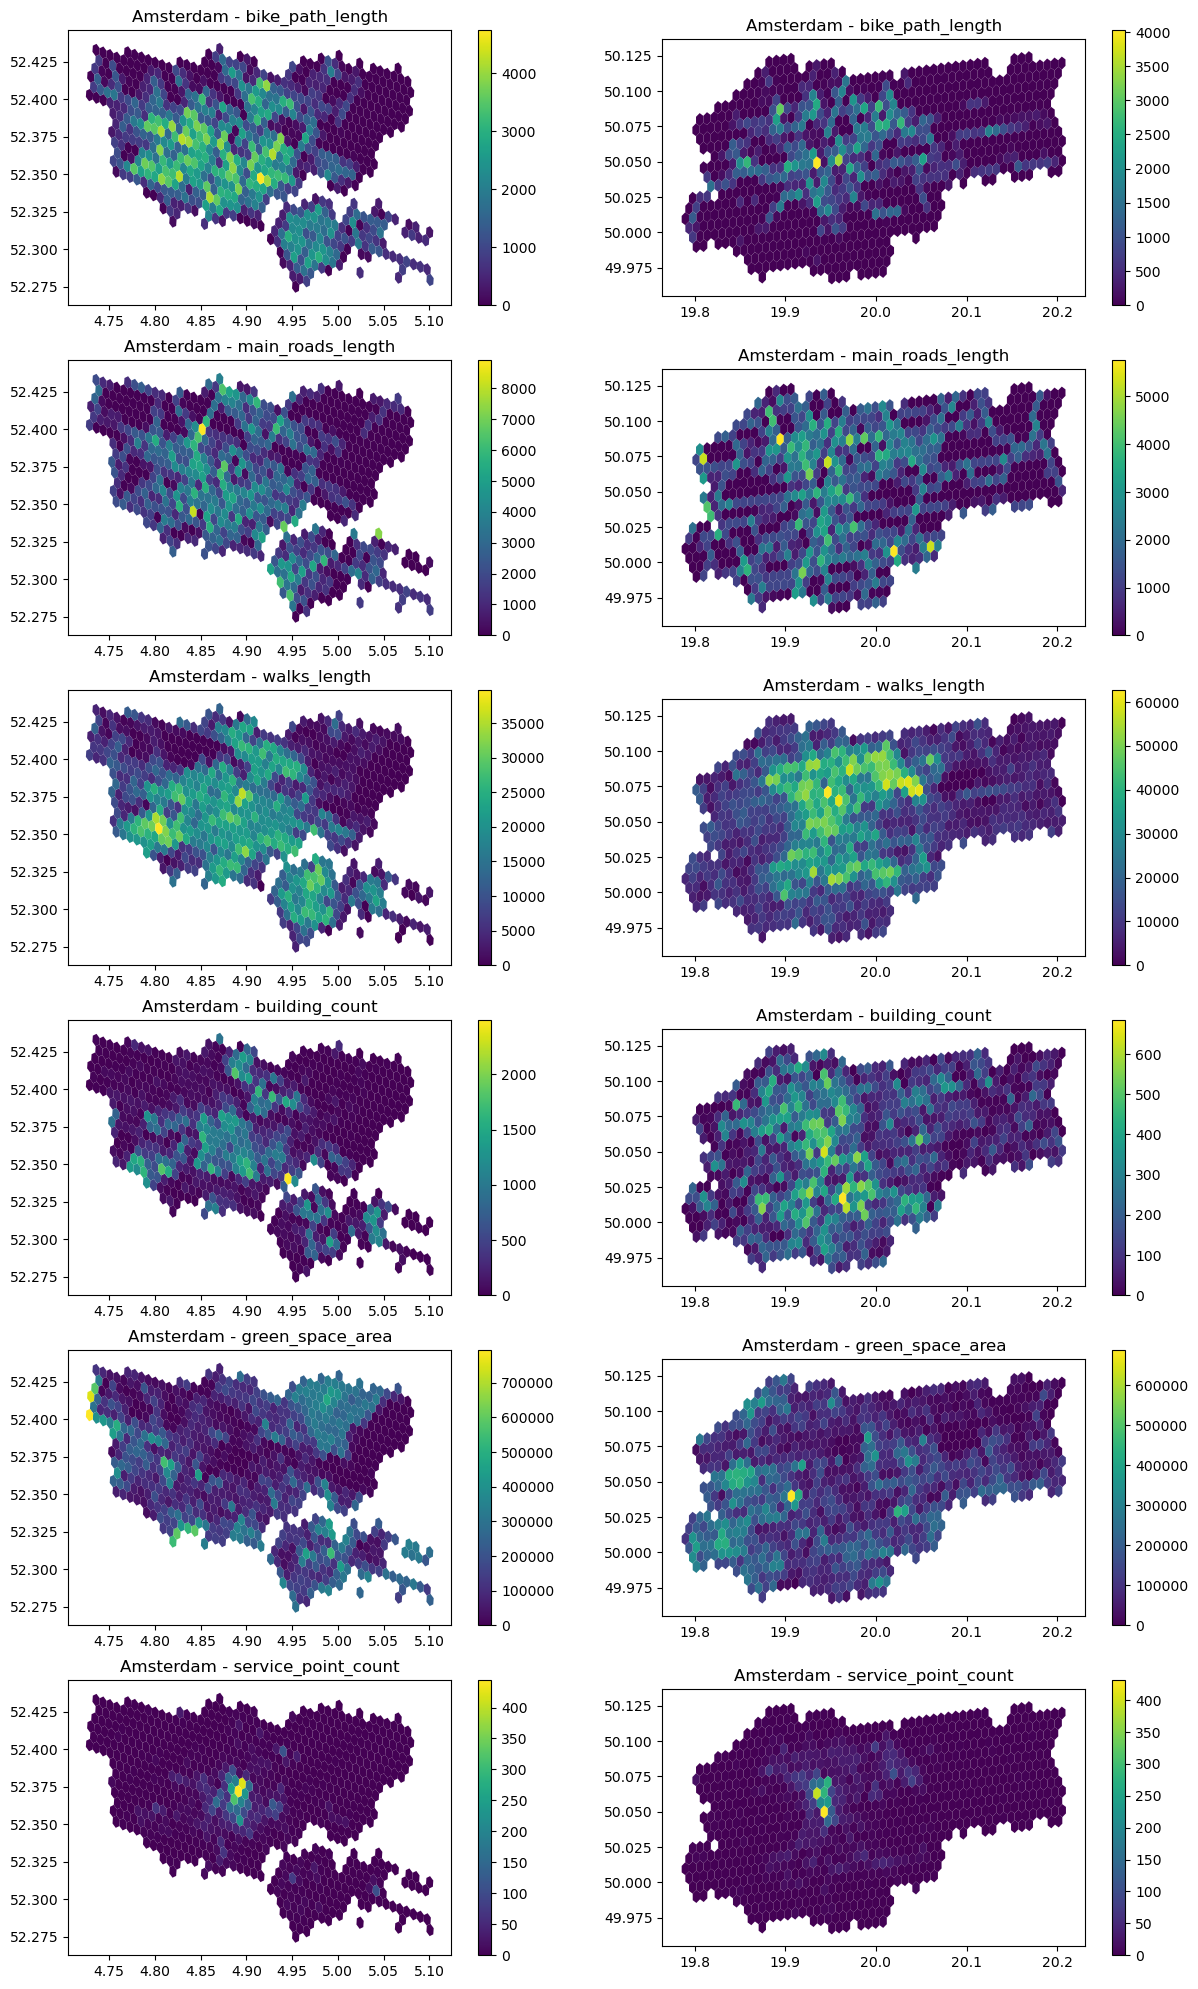

In [4]:
fig, axes = plt.subplots(6, 2, figsize=(15, 25))

cols = ['bike_path_length', 'main_roads_length', 'walks_length', 'building_count', 'green_space_area', 'service_point_count']

for i, col in enumerate(cols):
    gdf_ams.plot(column=col, legend=True, ax=axes[i][0])
    axes[i][0].set_title(f'Amsterdam - {col}')
    gdf_krk.plot(column=col, legend=True, ax=axes[i][1])
    axes[i][1].set_title(f'Amsterdam - {col}')

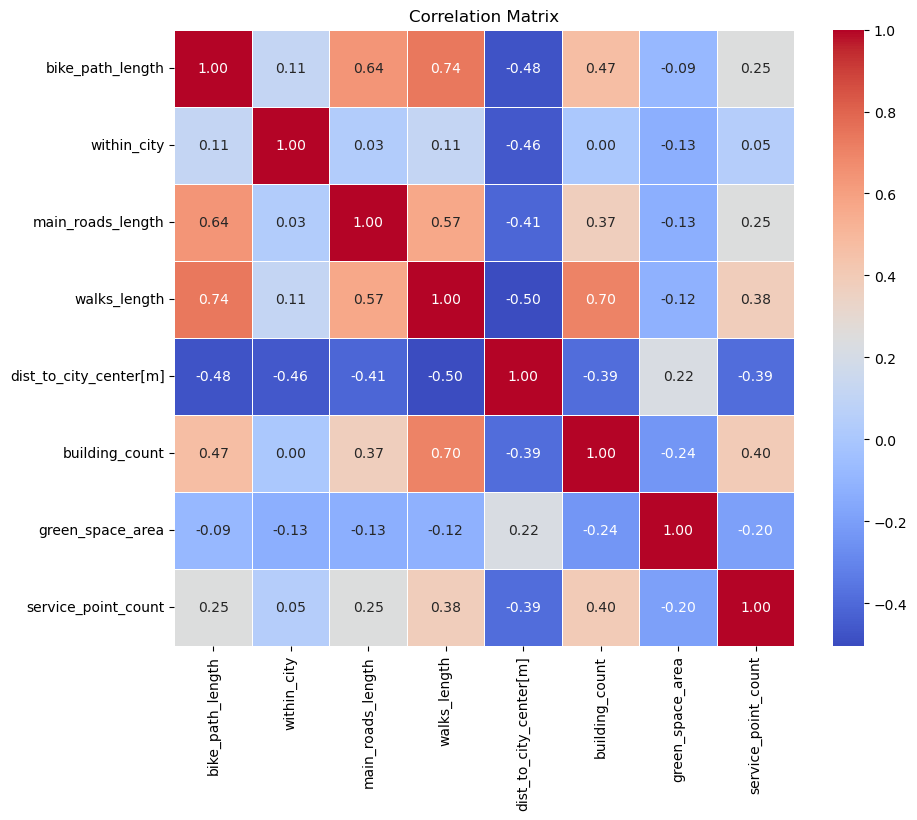

In [5]:
correlation_matrix = gdf_ams[['bike_path_length', 'within_city', 'main_roads_length', 'walks_length', 'dist_to_city_center[m]', 'building_count', 'green_space_area', 'service_point_count']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

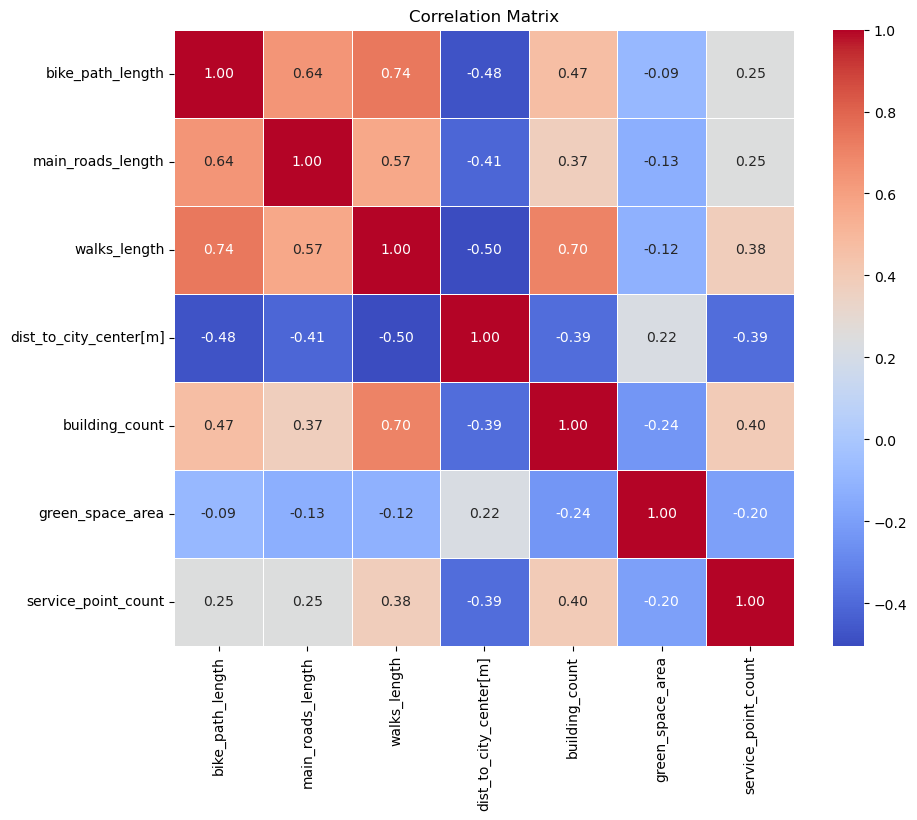

In [6]:
correlation_matrix = gdf_ams[['bike_path_length', 'main_roads_length', 'walks_length', 'dist_to_city_center[m]', 'building_count', 'green_space_area', 'service_point_count']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

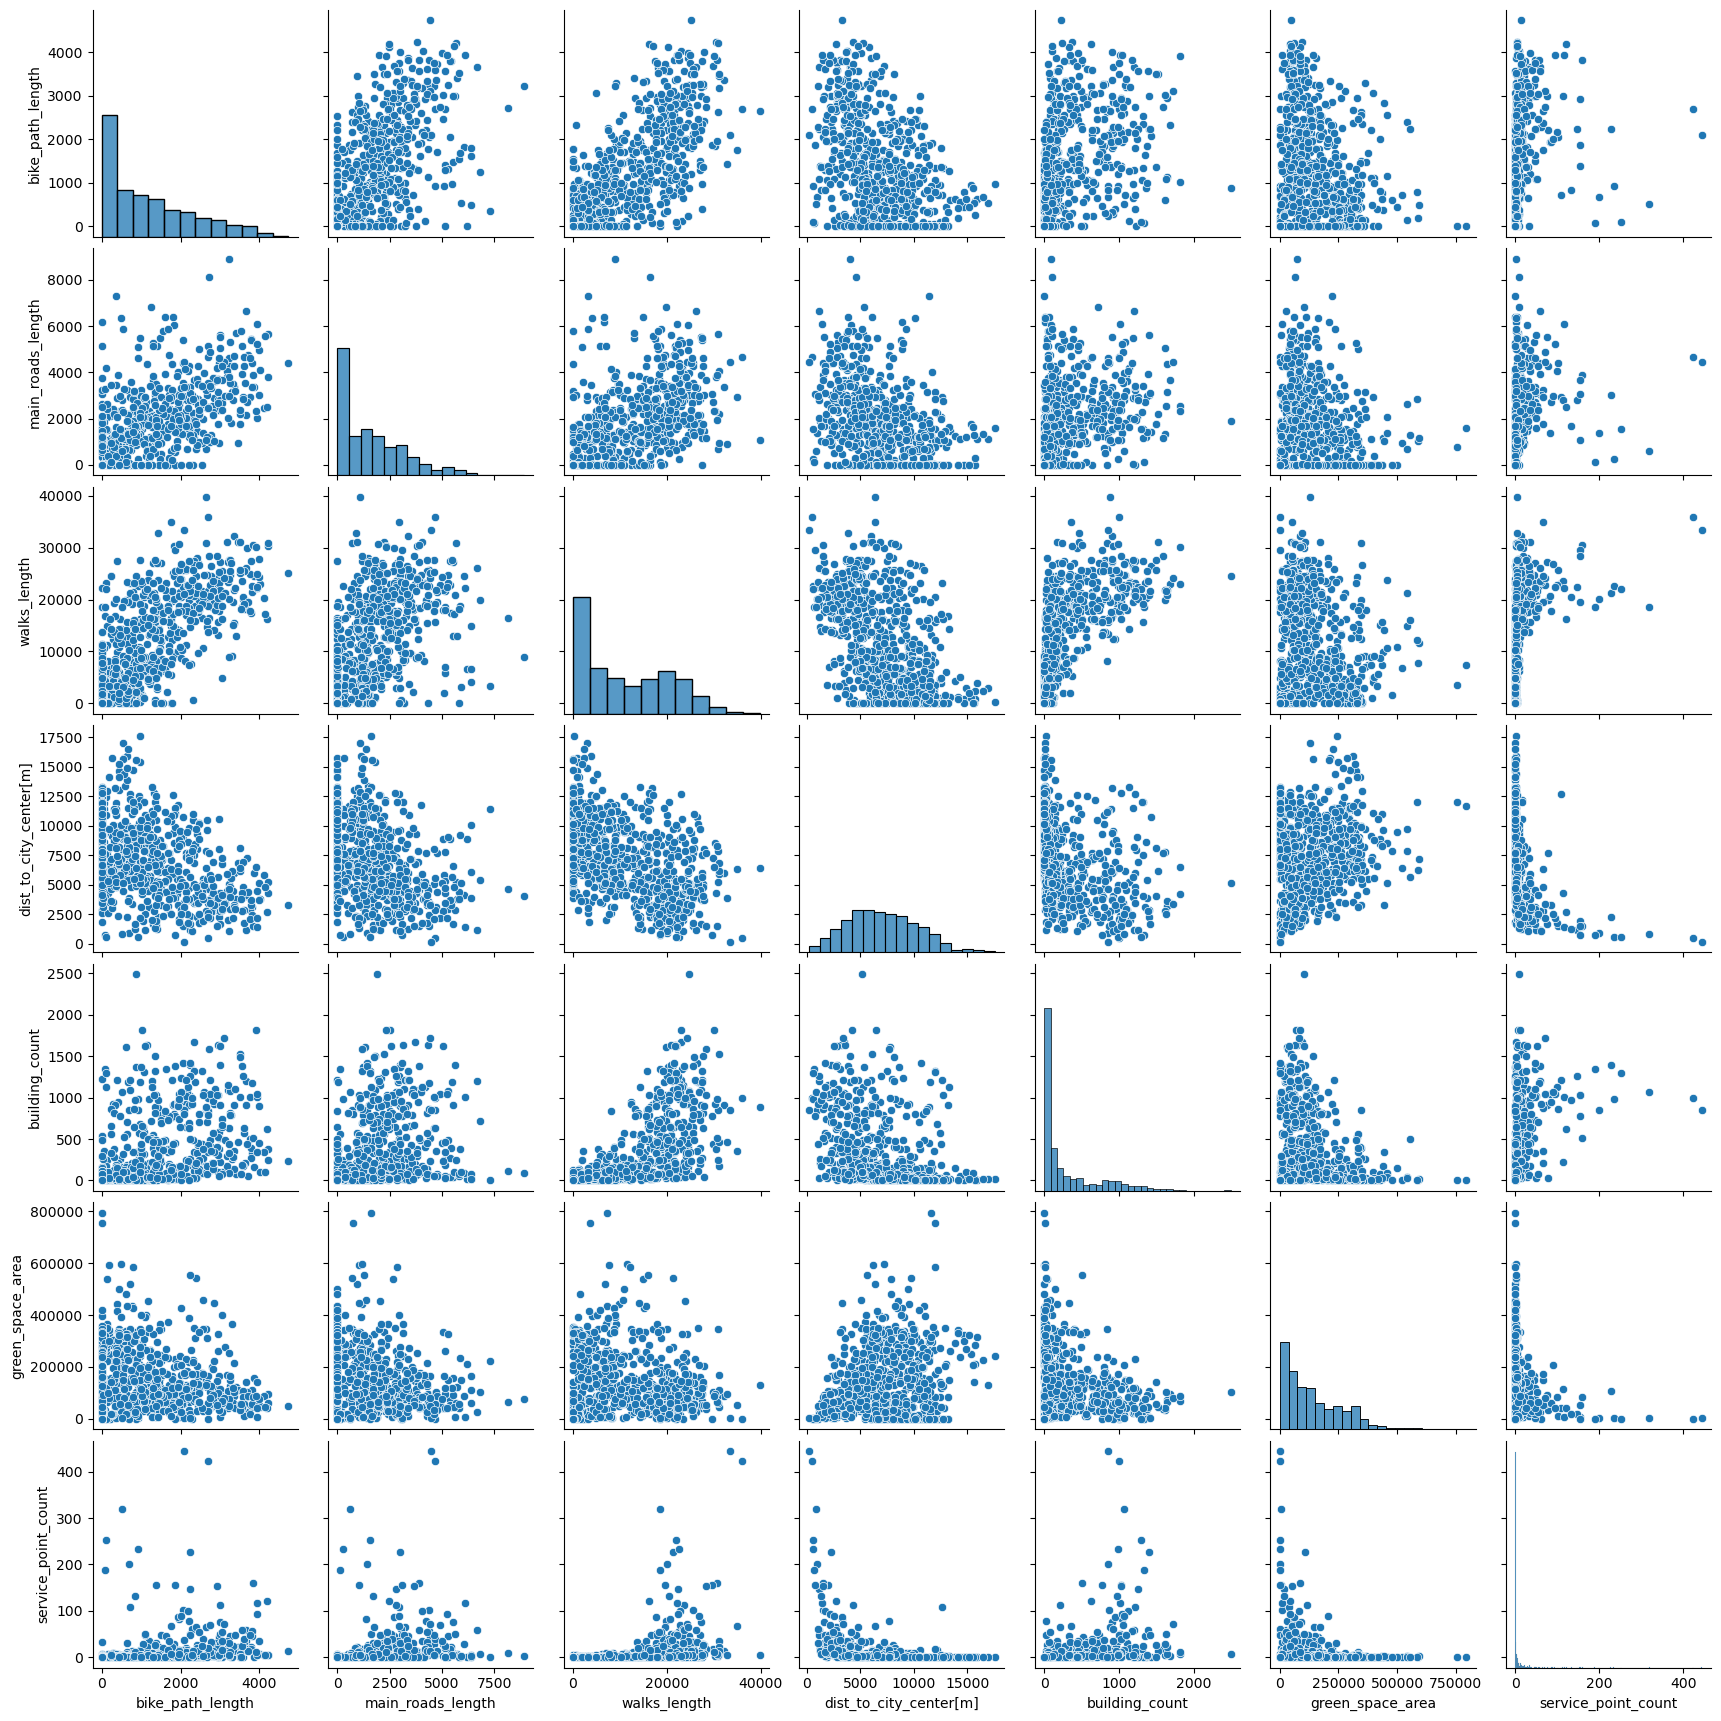

In [7]:
columns = ['bike_path_length', 'main_roads_length', 'walks_length', 'dist_to_city_center[m]', 'building_count', 'green_space_area', 'service_point_count']

sns.pairplot(gdf_ams[columns])

In [8]:
X = gdf_ams[['main_roads_length', 'walks_length', 'dist_to_city_center[m]', 'building_count', 'green_space_area', 'service_point_count']]
y = gdf_ams['bike_path_length']

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train_, X_test_, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_)
X_test = scaler.transform(X_test_)

In [10]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [37]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Las losowy - Mean Squared Error (MSE): {mse}')
print(f'Las losowy - Root Mean Squared Error (RMSE): {rmse}')
print(f'Las losowy - Mean Absolute Error (MAE): {mae}')
print(f'Las losowy - R^2 Score: {r2}')

Las losowy - Mean Squared Error (MSE): 526475.7168420525
Las losowy - Root Mean Squared Error (RMSE): 725.5864640703081
Las losowy - Mean Absolute Error (MAE): 522.7526732479524
Las losowy - R^2 Score: 0.5900638764704037


In [12]:
from sklearn.linear_model import LinearRegression

lin_regressor = LinearRegression()
lin_regressor.fit(X_train, y_train)
y_pred = lin_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Regresja liniowa - Mean Squared Error (MSE): {mse}')
print(f'Regresja liniowa - Root Mean Squared Error (RMSE): {rmse}')
print(f'Regresja liniowa - Mean Absolute Error (MAE): {mae}')
print(f'Regresja liniowa - R^2 Score: {r2}')

Regresja liniowa - Mean Squared Error (MSE): 565011.1868570124
Regresja liniowa - Root Mean Squared Error (RMSE): 751.6722602684048
Regresja liniowa - Mean Absolute Error (MAE): 556.2788553305024
Regresja liniowa - R^2 Score: 0.5600585396790339


In [32]:
from sklearn.svm import SVR

svr_regressor = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr_regressor.fit(X_train, y_train)
y_pred = svr_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'SVR - Mean Squared Error (MSE): {mse}')
print(f'SVR - Root Mean Squared Error (RMSE): {rmse}')
print(f'SVR - Mean Absolute Error (MAE): {mae}')
print(f'SVR - R^2 Score: {r2}')

SVR - Mean Squared Error (MSE): 1348908.693936043
SVR - Root Mean Squared Error (RMSE): 1161.4252855591026
SVR - Mean Absolute Error (MAE): 899.9722896471573
SVR - R^2 Score: -0.050317010448949206


In [14]:
from sklearn.ensemble import GradientBoostingRegressor

gbm_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gbm_model.fit(X_train, y_train)
y_pred = gbm_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'GBM - Mean Squared Error (MSE): {mse}')
print(f'GBM - Root Mean Squared Error (RMSE): {rmse}')
print(f'GBM - Mean Absolute Error (MAE): {mae}')
print(f'GBM - R^2 Score: {r2}')

GBM - Mean Squared Error (MSE): 563273.3152281742
GBM - Root Mean Squared Error (RMSE): 750.5153664170869
GBM - Mean Absolute Error (MAE): 557.1524558387831
GBM - R^2 Score: 0.561411719580647


In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [16]:
nn_model = Sequential()
nn_model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
nn_model.add(Dense(64, activation='relu'))
nn_model.add(Dense(1))

nn_model.compile(loss='mean_squared_error', optimizer='adam')
nn_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

y_pred = nn_model.predict(X_test).flatten()

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Neural Network Regressor - Mean Squared Error (MSE): {mse}')
print(f'Neural Network Regressor - Root Mean Squared Error (RMSE): {rmse}')
print(f'Neural Network Regressor - Mean Absolute Error (MAE): {mae}')
print(f'Neural Network Regressor - R^2 Score: {r2}')

C:\Users\Marcin\anaconda3\envs\ADWNOZ\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Neural Network Regressor - Mean Squared Error (MSE): 584717.172473281
Neural Network Regressor - Root Mean Squared Error (RMSE): 764.6680145483274
Neural Network Regressor - Mean Absolute Error (MAE): 579.0492123825715
Neural Network Regressor - R^2 Score: 0.5447146309374904


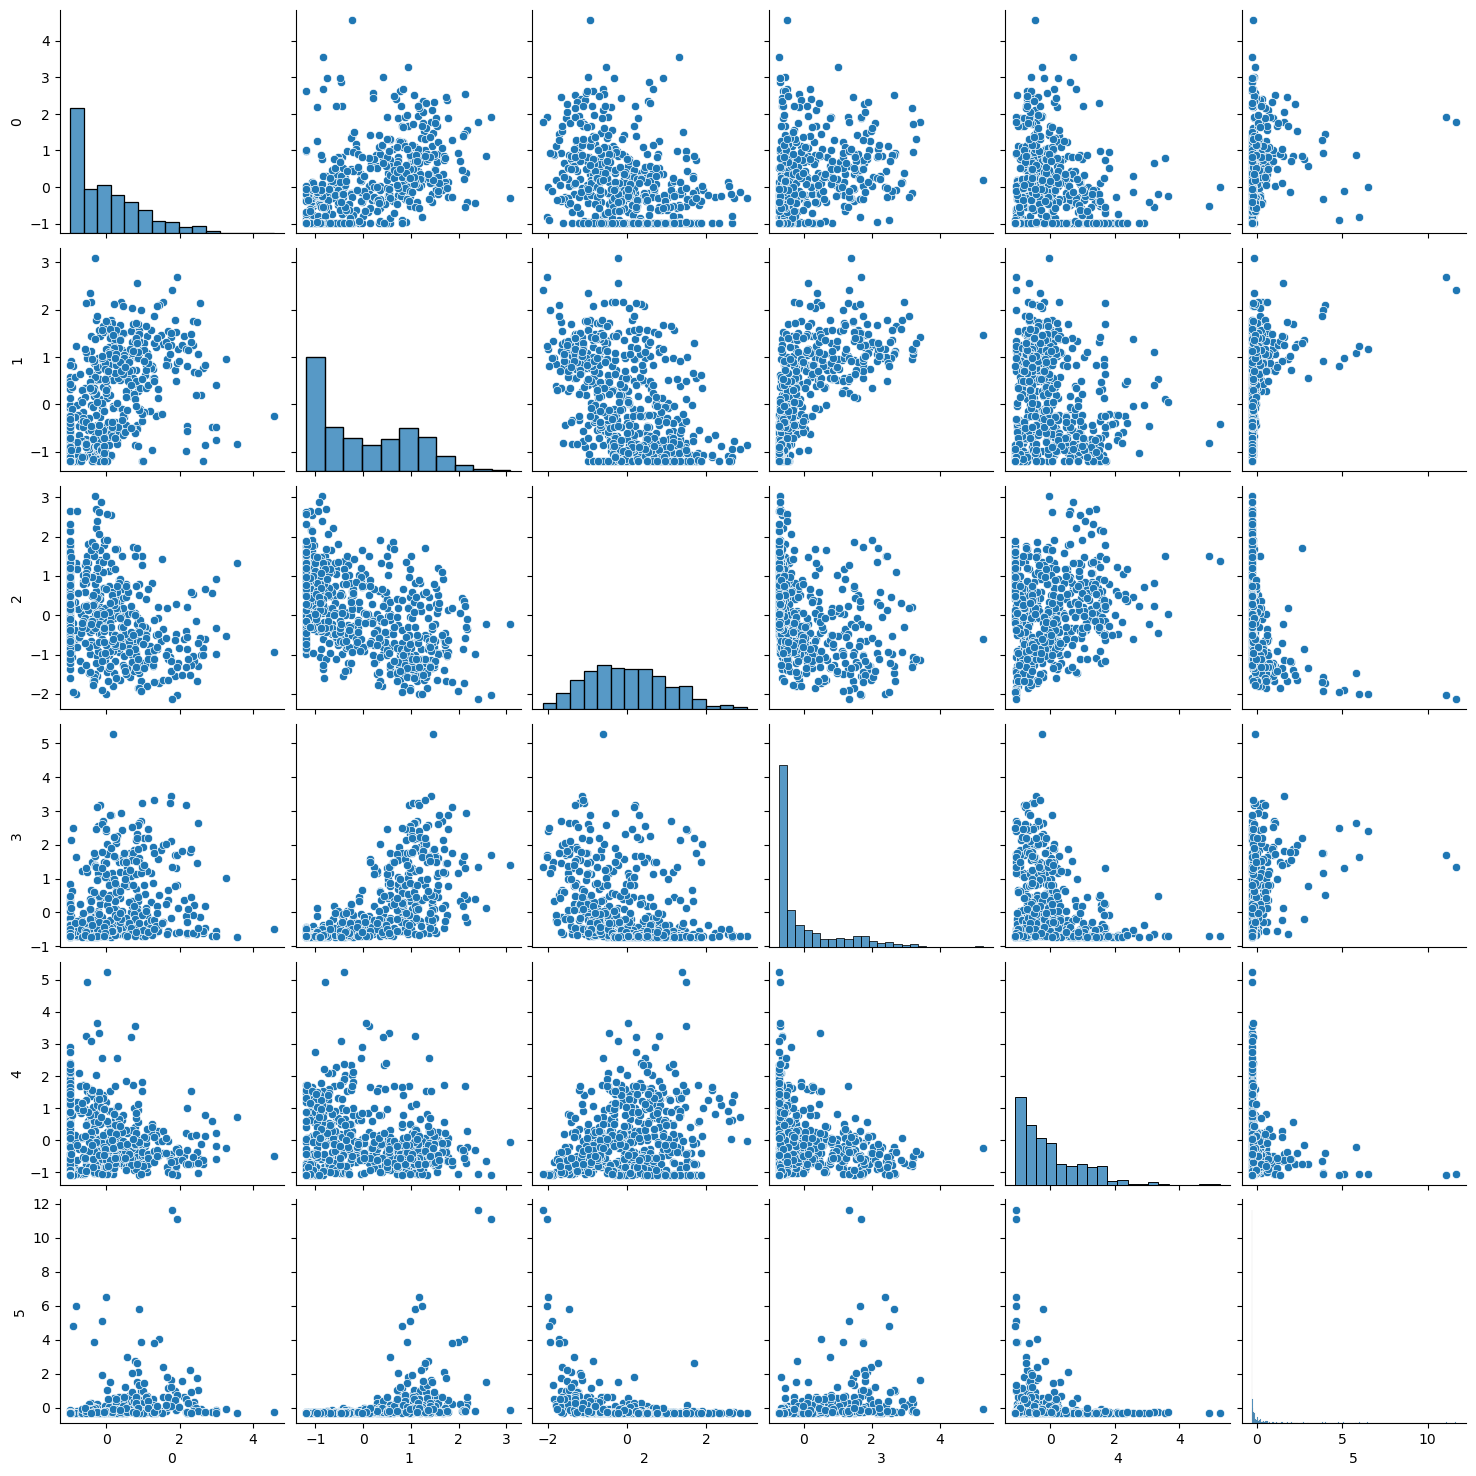

In [63]:
sns.pairplot(pd.DataFrame(X_train))

In [17]:
import mlflow
import mlflow.sklearn
import mlflow.keras

In [18]:
def train_and_log_model(model_name, model, X_train, X_test, y_train, y_test):
    with mlflow.start_run(run_name=model_name):
        # Trening modelu
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        # Predykcje na zbiorze testowym
        if model_name == "Neural Network Regressor":
            y_pred = y_pred.flatten()
     
        # Ocena modelu
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        # Logowanie metryk
        mlflow.log_metric("MSE", mse)
        mlflow.log_metric("RMSE", rmse)
        mlflow.log_metric("MAE", mae)
        mlflow.log_metric("R2", r2)
        
        # Logowanie modelu
        if model_name == "Neural Network Regressor":
            mlflow.keras.log_model(model, model_name)
        else:
            mlflow.sklearn.log_model(model, model_name)
        
        print(f"{model_name} - MSE: {mse}, RMSE: {rmse}, MAE: {mae}, R2: {r2}")

In [19]:
mlflow.set_tracking_uri("http://localhost:5000")  # Ustaw URI serwera MLflow
mlflow.set_experiment("Regression Models Comparison")

MlflowException: API request to http://localhost:5000/api/2.0/mlflow/experiments/get-by-name failed with exception HTTPConnectionPool(host='localhost', port=5000): Max retries exceeded with url: /api/2.0/mlflow/experiments/get-by-name?experiment_name=Regression+Models+Comparison (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x00000157CEE63E90>: Failed to establish a new connection: [WinError 10061] Nie można nawiązać połączenia, ponieważ komputer docelowy aktywnie go odmawia'))

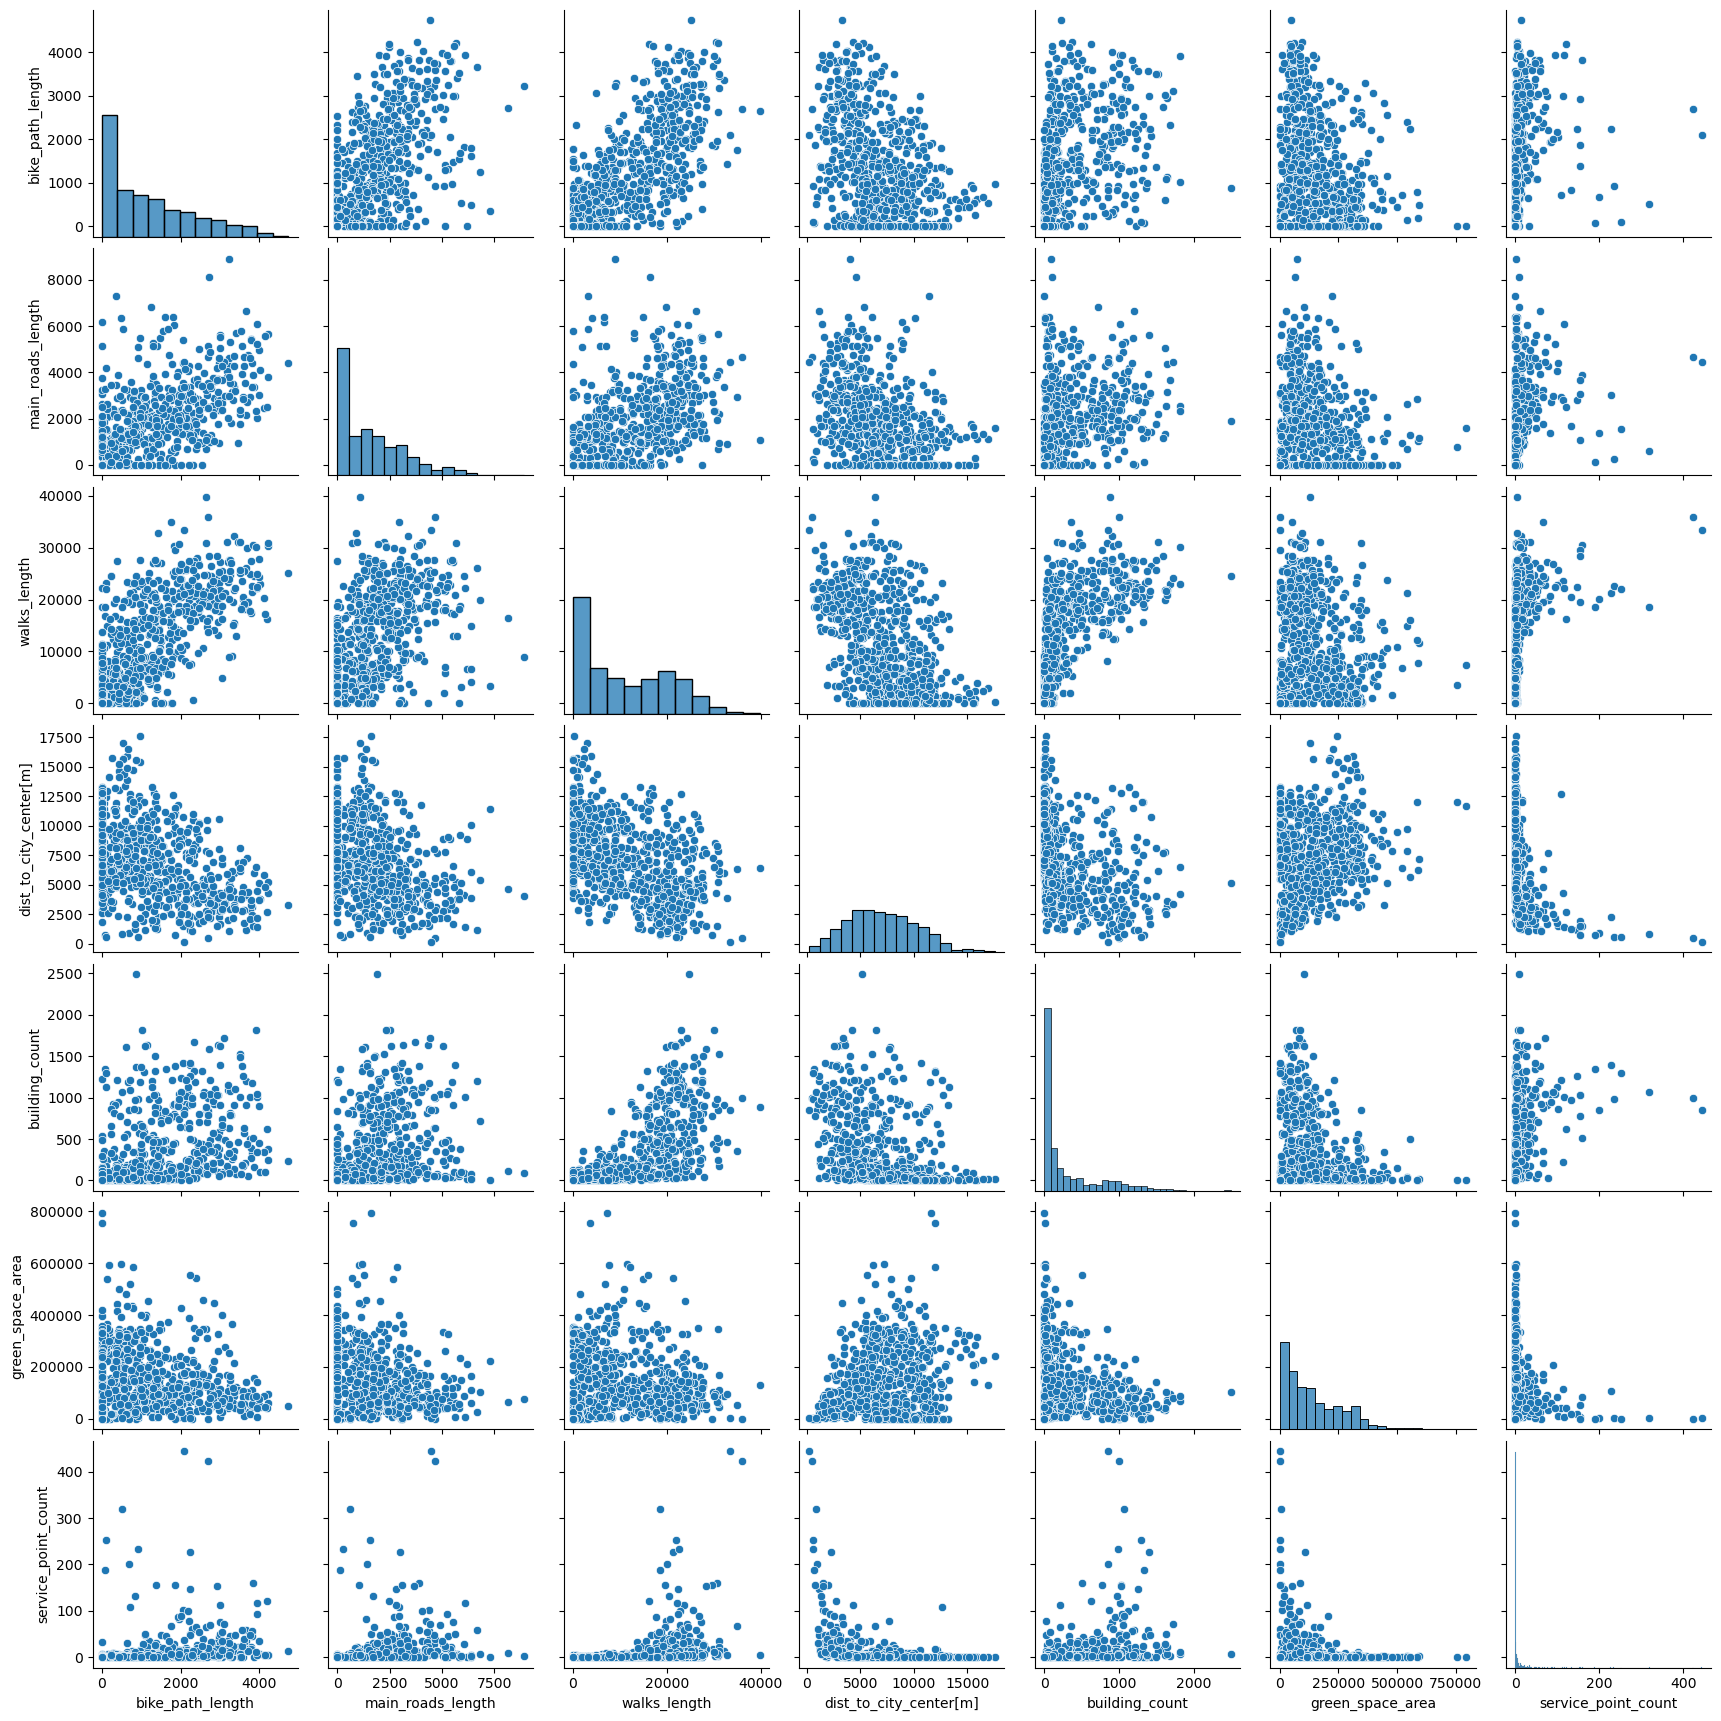

In [20]:
columns = ['bike_path_length', 'main_roads_length', 'walks_length', 'dist_to_city_center[m]', 'building_count', 'green_space_area', 'service_point_count']

sns.pairplot(gdf_ams[columns])

In [36]:
from sklearn.model_selection import GridSearchCV

models = {
    'LinearRegression': LinearRegression(),
    'SVR': SVR(),
    'RandomForestRegressor': RandomForestRegressor(random_state=42),
    'GradientBoostingRegressor': GradientBoostingRegressor(random_state=42)
}

# Definiowanie siatki hiperparametrów
param_grids = {
    'LinearRegression': {
        'fit_intercept': [True, False]
    },
    'SVR': {
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'C': [0.1, 1, 10],
        'epsilon': [0.1, 0.2, 0.3]
    },
    'RandomForestRegressor': {
        'n_estimators': [100, 150, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'GradientBoostingRegressor': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'subsample': [0.8, 1.0],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
}

# Przeprowadzenie GridSearchCV dla każdego modelu
best_models = {}
for model_name, model in models.items():
    print(f"Training {model_name}...")
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    best_models[model_name] = grid_search.best_estimator_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}\n")
    #print(f"RMSE na zbiorze testowym dla {model_name}: {np.sqrt(mean_squared_error(y_test, best_models[model_name].predict(X_test)))}\n")

# Wyniki najlepszych modeli
for model_name, model in best_models.items():
    print(f"Model: {model_name}")
    print(f"Best parameters: {model.get_params()}")
    y_pred = model.predict(X_test)
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")
    print(f"R2 score: {r2_score(y_test, y_pred)}\n")

Training LinearRegression...
Best parameters for LinearRegression: {'fit_intercept': True}

Training SVR...
Best parameters for SVR: {'C': 10, 'epsilon': 0.1, 'kernel': 'linear'}

Training RandomForestRegressor...
Best parameters for RandomForestRegressor: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}

Training GradientBoostingRegressor...
Best parameters for GradientBoostingRegressor: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50, 'subsample': 0.8}

Model: LinearRegression
Best parameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}
RMSE: 751.6722602684048
R2 score: 0.5600585396790339

Model: SVR
Best parameters: {'C': 10, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}
RMSE: 752.2530462946459
R2 score: 0.5593784279395354

Model: RandomFor

In [35]:
best_models

{'LinearRegression': LinearRegression(),
 'SVR': SVR(C=10, kernel='linear'),
 'RandomForestRegressor': RandomForestRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                       n_estimators=50, random_state=42),
 'GradientBoostingRegressor': GradientBoostingRegressor(min_samples_leaf=4, n_estimators=50, random_state=42,
                           subsample=0.8)}

In [40]:
gdf_krk_to_test = gdf_krk[['main_roads_length', 'walks_length', 'dist_to_city_center[m]', 'building_count', 'green_space_area', 'service_point_count']]
X_krk_test = scaler.transform(gdf_krk_to_test)

In [38]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Las losowy - Mean Squared Error (MSE): {mse}')
print(f'Las losowy - Root Mean Squared Error (RMSE): {rmse}')
print(f'Las losowy - Mean Absolute Error (MAE): {mae}')
print(f'Las losowy - R^2 Score: {r2}')

Las losowy - Mean Squared Error (MSE): 526475.7168420525
Las losowy - Root Mean Squared Error (RMSE): 725.5864640703081
Las losowy - Mean Absolute Error (MAE): 522.7526732479524
Las losowy - R^2 Score: 0.5900638764704037


In [42]:
krk_bike_path_length = gdf_krk['bike_path_length']

y_krk_pred = rf_model.predict(X_krk_test)

mse = mean_squared_error(krk_bike_path_length, y_krk_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(krk_bike_path_length, y_krk_pred)
r2 = r2_score(krk_bike_path_length, y_krk_pred)


print(f'Las losowy dla Krakowa - Mean Squared Error (MSE): {mse}')
print(f'Las losowy dla Krakowa - Root Mean Squared Error (RMSE): {rmse}')
print(f'Las losowy dla Krakowa - Mean Absolute Error (MAE): {mae}')
print(f'Las losowy dla Krakowa - R^2 Score: {r2}')

Las losowy dla Krakowa - Mean Squared Error (MSE): 1407237.669477436
Las losowy dla Krakowa - Root Mean Squared Error (RMSE): 1186.2704874848046
Las losowy dla Krakowa - Mean Absolute Error (MAE): 963.1584295881288
Las losowy dla Krakowa - R^2 Score: -2.9637195872996003


In [44]:
for model_name, model in best_models.items():
    print(f"Model: {model_name}")
    y_krk_pred = model.predict(X_krk_test)
    
    mse = mean_squared_error(krk_bike_path_length, y_krk_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(krk_bike_path_length, y_krk_pred)
    r2 = r2_score(krk_bike_path_length, y_krk_pred)

    print(f'{model_name} dla Krakowa - Mean Squared Error (MSE): {mse}')
    print(f'{model_name} dla Krakowa - Root Mean Squared Error (RMSE): {rmse}')
    print(f'{model_name} dla Krakowa - Mean Absolute Error (MAE): {mae}')
    print(f'{model_name} dla Krakowa - R^2 Score: {r2}\n')
    #print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")
    #print(f"R2 score: {r2_score(y_test, y_pred)}\n")

Model: LinearRegression
LinearRegression dla Krakowa - Mean Squared Error (MSE): 2173559.752935165
LinearRegression dla Krakowa - Root Mean Squared Error (RMSE): 1474.299750028862
LinearRegression dla Krakowa - Mean Absolute Error (MAE): 1139.674311056011
LinearRegression dla Krakowa - R^2 Score: -5.122193538263107

Model: SVR
SVR dla Krakowa - Mean Squared Error (MSE): 1488108.4147033028
SVR dla Krakowa - Root Mean Squared Error (RMSE): 1219.880491975875
SVR dla Krakowa - Mean Absolute Error (MAE): 964.9971442131589
SVR dla Krakowa - R^2 Score: -3.1915055283981753

Model: RandomForestRegressor
RandomForestRegressor dla Krakowa - Mean Squared Error (MSE): 1341561.4477130787
RandomForestRegressor dla Krakowa - Root Mean Squared Error (RMSE): 1158.2579366069886
RandomForestRegressor dla Krakowa - Mean Absolute Error (MAE): 936.7488295720615
RandomForestRegressor dla Krakowa - R^2 Score: -2.778731555587883

Model: GradientBoostingRegressor
GradientBoostingRegressor dla Krakowa - Mean Squa

C:\Users\Marcin\anaconda3\envs\ADWNOZ\Lib\site-packages\geopandas\geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


Text(0.5, 1.0, 'Predicted bike path length in Krakow')

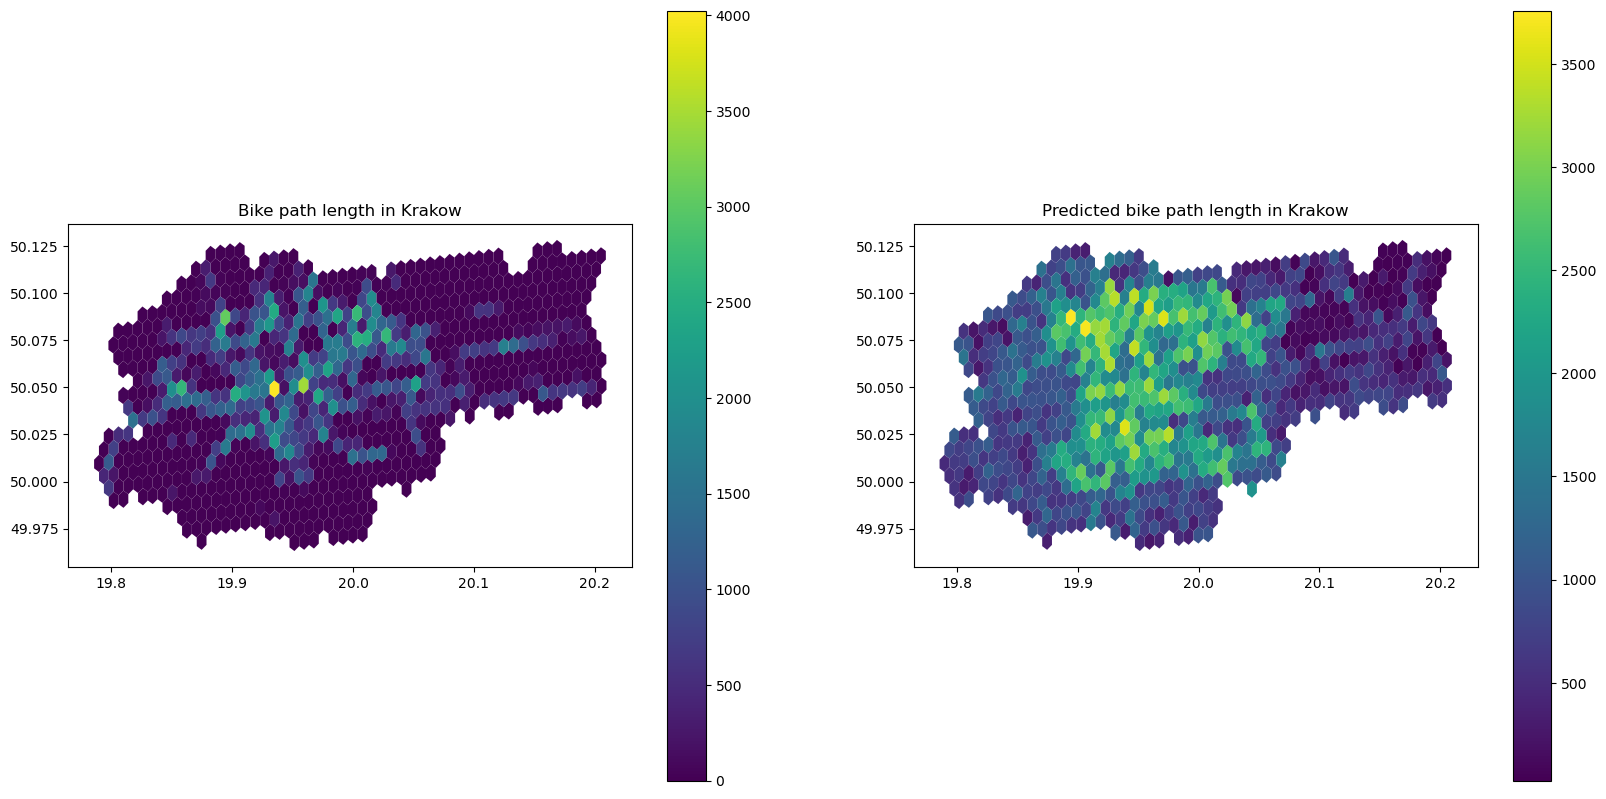

In [52]:
data_to_plot = gdf_krk[['geometry', 'bike_path_length']]
data_to_plot.loc[:, 'predicted_bike_path_length'] = y_krk_pred
data_to_plot

fig, axes = plt.subplots(1, 2, figsize=(20, 10))

data_to_plot.plot(column='bike_path_length', legend=True, ax=axes[0])
axes[0].set_title('Bike path length in Krakow')

data_to_plot.plot(column='predicted_bike_path_length', legend=True, ax=axes[1])
axes[1].set_title('Predicted bike path length in Krakow')
